First few rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Summary Statistics:
          longitude  

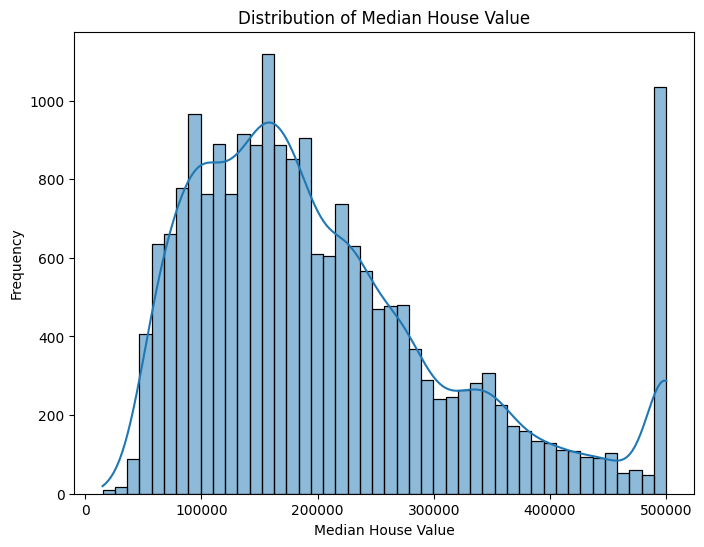

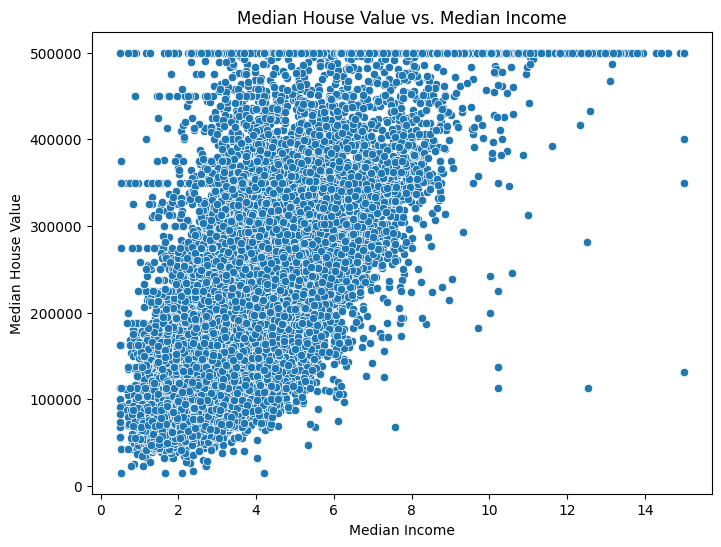

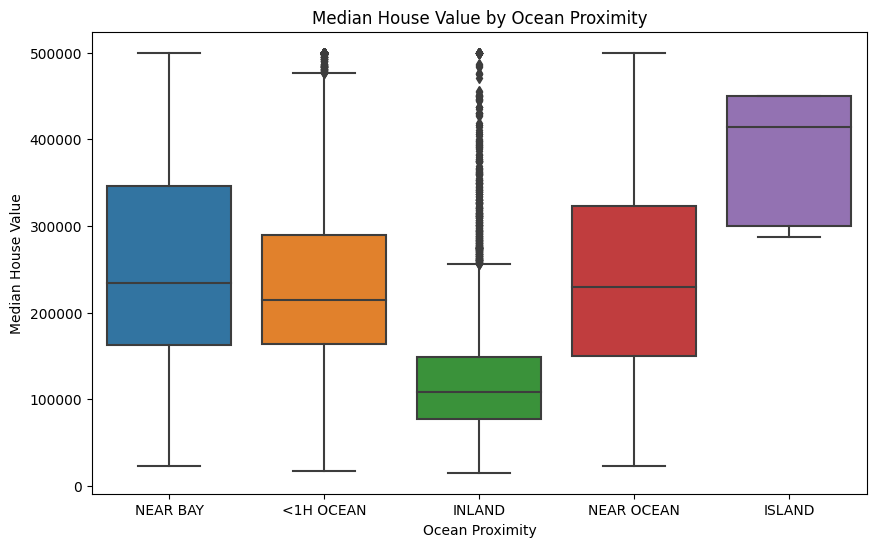

In [11]:
#Task2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\Owner\Downloads\archive (5)\housing.csv'

try:
    # Step 1: Load the dataset with error handling and encoding parameter
    df = pd.read_csv(file_path, encoding='utf-8')

    # Step 2: Clean up column names by removing spaces and parentheses
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('(', '')
    df.columns = df.columns.str.replace(')', '')

    # Step 3: Print the first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())

    # Step 4: Data Exploration - Summary Statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Step 5: Data Exploration - Data Types and Missing Values
    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Step 6: Data Visualization


    # Histogram of the target variable (e.g., 'median_house_value')
    plt.figure(figsize=(8, 6))
    sns.histplot(df['median_house_value'], kde=True)
    plt.title('Distribution of Median House Value')
    plt.xlabel('Median House Value')
    plt.ylabel('Frequency')
    plt.show()

    # Scatter plot of 'median_income' vs. 'median_house_value'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='median_income', y='median_house_value', data=df)
    plt.title('Median House Value vs. Median Income')
    plt.xlabel('Median Income')
    plt.ylabel('Median House Value')
    plt.show()

    # Box plot of 'ocean_proximity' vs. 'median_house_value'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
    plt.title('Median House Value by Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel('Median House Value')
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"Error occurred while reading the file: {e}")


In [4]:
#Task 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

file_path = r'C:\Users\Owner\Downloads\archive (5)\housing.csv'

try:
    # Step 1: Load the dataset with error handling and encoding parameter
    df = pd.read_csv(file_path, encoding='utf-8')

    # Step 2: Clean up column names by removing spaces and parentheses
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('(', '')
    df.columns = df.columns.str.replace(')', '')

    # Step 3: Print the first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())

    # Step 4: Data Exploration - Summary Statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Step 5: Data Exploration - Data Types and Missing Values
    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Step 6: Data Preprocessing - Handling Missing Values
    # We will use SimpleImputer to fill missing values in the 'total_bedrooms' column with the median.
    imputer = SimpleImputer(strategy='median')
    df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

    # Step 7: Data Preprocessing - Encoding Categorical Feature
    # We will use LabelEncoder to convert 'ocean_proximity' into numerical values.
    label_encoder = LabelEncoder()
    df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

    # Step 8: Splitting the Data into Training and Testing Sets
    # We will split the data into features (X) and target (y) and then further split them into training and testing sets.
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the shapes of the training and testing sets
    print("\nShapes of training and testing sets:")
    print("X_train:", X_train.shape)
    print("X_test:", X_test.shape)
    print("y_train:", y_train.shape)
    print("y_test:", y_test.shape)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"Error occurred while reading the file: {e}")


First few rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Summary Statistics:
          longitude  

In [6]:
#Task 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = r'C:\Users\Owner\Downloads\archive (5)\housing.csv'

try:
    # Step 1: Load the dataset with error handling and encoding parameter
    df = pd.read_csv(file_path, encoding='utf-8')

    # Step 2: Clean up column names by removing spaces and parentheses
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('(', '')
    df.columns = df.columns.str.replace(')', '')

    # Step 3: Print the first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())

    # Step 4: Data Exploration - Summary Statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Step 5: Data Exploration - Data Types and Missing Values
    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Step 6: Data Preprocessing - Handling Missing Values
    # We will use SimpleImputer to fill missing values in the 'total_bedrooms' column with the median.
    imputer = SimpleImputer(strategy='median')
    df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

    # Step 7: Data Preprocessing - Encoding Categorical Feature
    # We will use LabelEncoder to convert 'ocean_proximity' into numerical values.
    label_encoder = LabelEncoder()
    df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

    # Step 8: Splitting the Data into Training and Testing Sets
    # We will split the data into features (X) and the target (y) and then further split them into training and testing sets.
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 9: Model 1 - Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Step 10: Model 2 - Random Forest Regression
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train, y_train)

    # Step 11: Evaluation on the Testing Set
    linear_y_pred = linear_model.predict(X_test)
    random_forest_y_pred = random_forest_model.predict(X_test)

    linear_mse = mean_squared_error(y_test, linear_y_pred)
    random_forest_mse = mean_squared_error(y_test, random_forest_y_pred)

    linear_r2 = r2_score(y_test, linear_y_pred)
    random_forest_r2 = r2_score(y_test, random_forest_y_pred)

    print("\nLinear Regression - Mean Squared Error:", linear_mse)
    print("Linear Regression - R-squared:", linear_r2)

    print("\nRandom Forest Regression - Mean Squared Error:", random_forest_mse)
    print("Random Forest Regression - R-squared:", random_forest_r2)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"Error occurred while reading the file: {e}")


First few rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Summary Statistics:
          longitude  

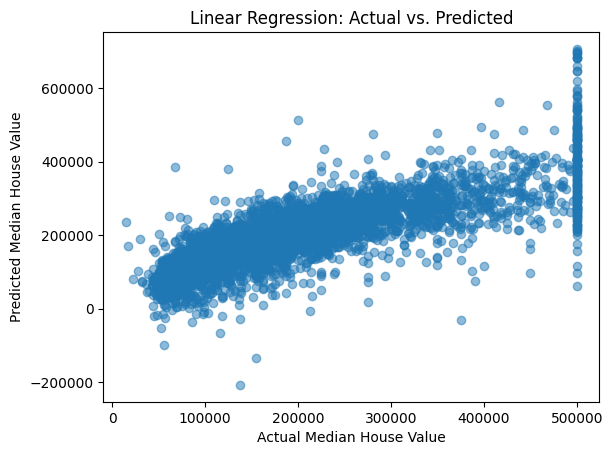

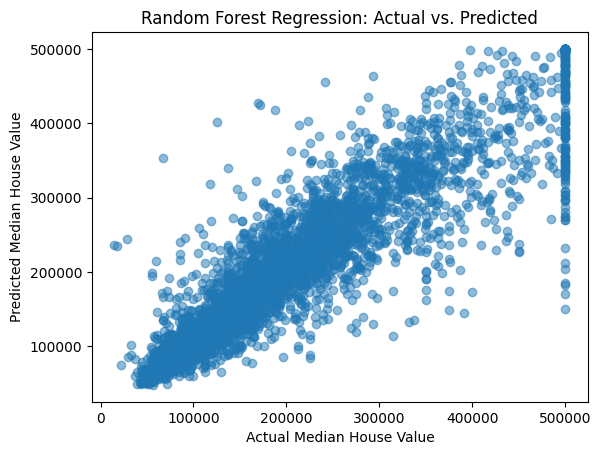

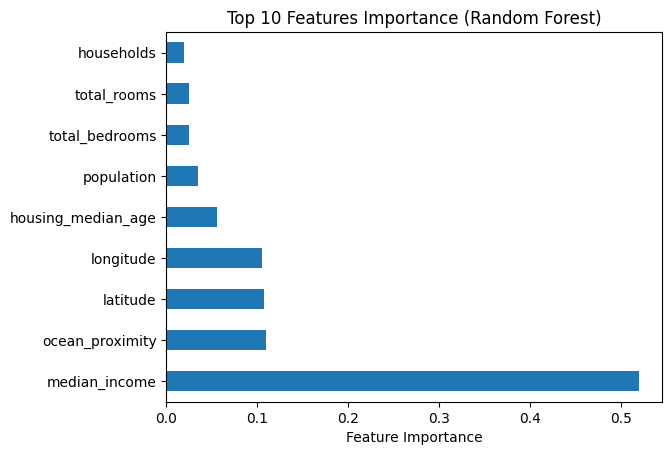

In [12]:
#Task 5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = r'C:\Users\Owner\Downloads\archive (5)\housing.csv'

try:

    # Step 12: Visualization - Scatter Plot of Actual vs. Predicted Values for Linear Regression
    plt.scatter(y_test, linear_y_pred, alpha=0.5)
    plt.xlabel("Actual Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.title("Linear Regression: Actual vs. Predicted")
    plt.show()

    # Step 13: Visualization - Scatter Plot of Actual vs. Predicted Values for Random Forest Regression
    plt.scatter(y_test, random_forest_y_pred, alpha=0.5)
    plt.xlabel("Actual Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.title("Random Forest Regression: Actual vs. Predicted")
    plt.show()

    # Step 14: Visualization - Feature Importance for Random Forest Regression
    feature_importance = pd.Series(random_forest_model.feature_importances_, index=X.columns)
    feature_importance.nlargest(10).plot(kind='barh')
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Features Importance (Random Forest)")
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"Error occurred while reading the file: {e}")
